# **Tugas 1 Praktikum Metode Peramalan**
- **Nama Lengkap:** Andriansah
- **NIF:** 22320
- **Program Studi:** Statistika

## **Import Semua Packages/Library yang Digunakan**

In [1]:
install.packages("openxlsx")
install.packages("dplyr")
install.packages("forecast")
install.packages("tseries")
install.packages("ggplot2")
install.packages("TTR")
install.packages("xts")
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [2]:
library(openxlsx)
library(dplyr)
library(forecast)
library(tseries)
library(zoo)
library(TTR)
library(xts)
library(ggfortify)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', 

## **Jawaban Nomor 1**

### **1. Prinsip Kerja Metode Peramalam**

#### **Metode Naive**
Prinsip kerja metode Naive adalah dengan mengambil nilai observasi terakhir sebagai perkiraan untuk periode selanjutnya tanpa melakukan perhitungan tambahan atau mempertimbangkan tren dan pola musiman.

#### **Simple Moving Average**
Prinsip kerja Simple Moving Average (SMA) adalah dengan mengambil rata-rata dari N data terakhir dalam suatu deret waktu untuk menghasilkan nilai estimasi pada periode berikutnya. Setiap kali data baru masuk, data yang paling lama akan dihapus, sehingga perhitungan selalu diperbarui dan bergerak seiring waktu.

### **Double Moving Average**
Prinsip kerja Double Moving Average (DMA) terdiri dari dua langkah perataan bertahap untuk mengidentifikasi tren dalam data deret waktu. Pertama, dilakukan perhitungan Simple Moving Average (SMA) dengan periode tertentu M, yang menghasilkan serangkaian nilai rata-rata pertama. Kedua, hasil dari SMA pertama kemudian digunakan untuk menghitung SMA kedua dengan periode N, yang menghasilkan rata-rata yang lebih halus. Proses ini membantu mengurangi fluktuasi acak dan menyoroti pola tren yang lebih jelas. Setelah kedua perhitungan ini selesai dapat dilakukan penyesuaian untuk memperkirakan kecenderungan data ke periode mendatang berdasarkan perbedaan antara SMA pertama dan kedua.

### **Single Exponential Smoothing**
Prinsip kerja Single Exponential Smoothing (SES) adalah memberikan bobot lebih besar pada data terbaru dalam peramalan, sementara data lama memiliki pengaruh yang semakin kecil secara eksponensial. Metode ini bekerja dengan memperbarui prediksi setiap periode menggunakan rata-rata tertimbang dari nilai aktual sebelumnya dan prediksi sebelumnya.

### **Double Exponential Smoothing**
Double Exponential Smoothing (DES) adalah metode peramalan yang digunakan untuk data dengan tren dengan cara memperbarui dua komponen utama yaitu level (rata-rata yang diperhalus) dan tren (kecepatan perubahan) di mana metode DES ini memberikan bobot lebih besar pada data terbaru untuk menangkap tren dengan lebih baik dibandingkan Single Exponential Smoothing.

## **2. Metode Peramalan untuk Data dengan Fluktuasi Acak**
Simple Moving Average paling cocok digunakan jika terdapat pola data yang menunjukkan fluktuasi acak tanpa tren yang jelas karena metode ini bekerja dengan cara mengambil rata-rata sejumlah periode sebelumnya yang dapat mengurangi dampak dari lonjakan atau penurunan nilai yang bersifat acak.

## **3. Metode Peramalan untuk Data dengan Tren Penjualan Meningkat**
Double Exponential Smoothing (DES) cocok untuk data dengan tren meningkat karena tidak hanya memperhitungkan nilai historis tetapi juga mengakomodasi pola tren dalam data di mana ini menggunakan dua tingkat perataan eksponensial yaitu untuk level dasar dan tren sehingga dapat menangkap perubahan arah pertumbuhan secara lebih akurat dibandingkan metode sederhana seperti Simple Moving Average atau Single Exponential Smoothing.

## **4. Menentukan Parameter pada Single Exponential Smoothing**
Jika ingin menggunakan metode Single Eksponensial Smoothing untuk
menentukan parameter terbaiknya yaitu sebagai berikut.
- Terlebih dahulu menentukan nilai awal pada data
- Menghitung nilai peramalan dengan metode simulasi atau trial and error menggunakan nilai 𝛼 antara 0 sampai 1 untuk mengetahui berapa nilai 𝛼 yang paling optimum
- Mentukan selisih antara nilai aktual dan nilai peramalan kemudian menggunakan RMSE (Root Mean Squared Error) sebagai metrik evaluasi
- Memilih  nilai 𝛼 yang menghasilkan error paling kecil (optimum) seperti berdasarkan RMSE paling kecil nilai 𝛼 dianggap sebagai parameter optimal
- Melakukan peramalan data metode SES dengan nilai 𝛼 nilai dipilih untuk meramal data selanjutnya

## **5. Pengaruh Pemilihan Nilai Parameter Smoothing (α, β) dalam Double Exponential Smoothing**
Dalam Double Exponential Smoothing (DES) pemilihan nilai parameter smoothing α (level smoothing) dan β (trend smoothing) sangat mempengaruhi hasil peramalan yang dijelaskan sebagai berikut.  
- Nilai α mendekati  0 akan lebih mengandalkan data historis sehingga lebih stabil tetapi lebih lambat dalam menyesuaikan perubahan tren lebih cocok untuk data yang lebih konstan.
- Nilai α mendekati 1 akan lebih sensitif terhadap perubahan data terbaru, tetapi juga lebih rentan terhadap fluktuasi acak (kurang stabil) lebih cocok untuk data yang mengalami perubahan cepat.  
- Nilai β mendekati mendekati 0 tren akan diperbarui dengan lebih lambat, membuat model lebih stabil tetapi kurang mampu menangkap perubahan tren secara dinamis.  
- Nilai β mendekati mendekati 1 tren akan diperbarui dengan cepat sehingga model lebih responsif terhadap perubahan tren yang baru muncul tetapi bisa menghasilkan prediksi yang lebih berfluktuasi.

Pemilihan kombinasi optimal α dan β dilakukan dengan mencoba berbagai nilai dan memilih yang menghasilkan error peramalan paling kecil seperti berdasarkan RMSE agar model tetap akurat dan adaptif terhadap pola data.

## **Jawaban Nomor 2**

In [4]:
# Import Data Nomor 2
data2 = read.xlsx("/content/Data Tugas 1.xlsx", sheet = 1)
head(data2)

,Date,Junction,Vehicles
,<chr>,<dbl>,<dbl>
1,2015-11-01,1,327
2,2015-11-01,2,133
3,2015-11-02,1,546
4,2015-11-02,2,197
5,2015-11-03,1,544
6,2015-11-03,2,217


In [5]:
# Memisahkan data berdasarkan Junction
wayne_tower <- data2 %>% filter(Junction == 1)
wayne_tower <- wayne_tower[,-2]
head(wayne_tower)

arkham_bridge <- data2 %>% filter(Junction == 2)
arkham_bridge <- arkham_bridge[,-2]
head(arkham_bridge)

# Mengubah tipe data menjadi time series
ts_wayne_tower <- ts(wayne_tower$Vehicles, start = c(2015, 11), frequency = 365)
ts_arkham_bridge <- ts(arkham_bridge$Vehicles, start = c(2015, 11), frequency = 365)

,Date,Vehicles
,<chr>,<dbl>
1,2015-11-01,327
2,2015-11-02,546
3,2015-11-03,544
4,2015-11-04,498
5,2015-11-05,464
6,2015-11-06,446


,Date,Vehicles
,<chr>,<dbl>
1,2015-11-01,133
2,2015-11-02,197
3,2015-11-03,217
4,2015-11-04,199
5,2015-11-05,200
6,2015-11-06,199


### **a. Periksa Stasioneritas Data**
Menggunakan Augmented Dickey-Fuller (ADF) Test untuk menentukan apakah data jumlah
kendaraan pada Wayne Tower dan Arkham Bridge bersifat stasioner atau tidak.


In [6]:
# Augmented Dickey-Fuller (ADF) Test Wayne Tower
adf_wayne_tower <- adf.test(ts_wayne_tower)
print(adf_wayne_tower)

Warning message in adf.test(ts_wayne_tower):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_wayne_tower
Dickey-Fuller = -6.1069, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



### **Uji Stasioner Data Jumlah Kendaraan pada Wayne Tower**
*   **Hipotesis**\
$H_0:$ Data jumlah kendaraan pada Wayne Tower bersifat tidak stasioner\
$H_1:$ Data jumlah kendaraan pada Wayne Tower bersifat stasioner

*   **Tingkat Signifikansi**\
$\alpha = 5\%$

*   **Statistik Uji**\
P-Value = $0.01$

*   **Daerah Kritik**\
$H_0$ ditolak jika P-Value $< \alpha$

*   **Kesimpulan**\
Karena P-Value = $0.01 < 5\%$, maka $H_0$ akan ditolak. Sehingga dapat disimpulkan bahwa data jumlah kendaraan pada Wayne Tower bersifat stasioner.

In [7]:
# Augmented Dickey-Fuller (ADF) Test Arkham Bridge
adf_arkham_bridge <- adf.test(ts_arkham_bridge)
print(adf_arkham_bridge)


	Augmented Dickey-Fuller Test

data:  ts_arkham_bridge
Dickey-Fuller = -2.2001, Lag order = 8, p-value = 0.4936
alternative hypothesis: stationary



### **Uji Stasioner Data Jumlah Kendaraan pada Arkham Bridge**
*   **Hipotesis**\
$H_0:$ Data jumlah kendaraan pada Arkham Bridge bersifat tidak stasioner\
$H_1:$ Data jumlah kendaraan pada Arkham Bridge bersifat stasioner

*   **Tingkat Signifikansi**\
$\alpha = 5\%$

*   **Statistik Uji**\
P-Value = $0.4936$

*   **Daerah Kritik**\
$H_0$ ditolak jika P-Value $< \alpha$

*   **Kesimpulan**\
Karena P-Value = $0.4936 > 5\%$, maka $H_0$ tidak ditolak. Sehingga dapat disimpulkan bahwa data jumlah kendaraan pada Arkham Bridge bersifat tidak stasioner.

## **b. Prediksi Lalu Lintas dengan metode Moving Average**



Berdasarkan hasil uji ADF sebelumnya dapat digunakan untuk menentukan metode yang paling sesuai dalam meramalkan data jumlah kendaraan pada Wayne Tower adalah Simple Moving Average karena data menunjukkan sifat stasioner. Sementara itu, metode yang paling sesuai untuk meramalkan data jumlah kendaraan pada Arkham Bridge metode Double Moving Average karena memiliki karakteristik data yang bersifat tidak stasioner.

### **Simple Moving Average Wayne Tower**

Warning message in ets(object, model = "ZZN", lambda = lambda, biasadj = biasadj, :
“Missing values encountered. Using longest contiguous portion of time series”


          Point Forecast    Lo 80    Hi 80   Lo 95    Hi 95
2016.6904       2023.191 1744.827 2301.556 1597.47 2448.913


RMSE: 103.2099

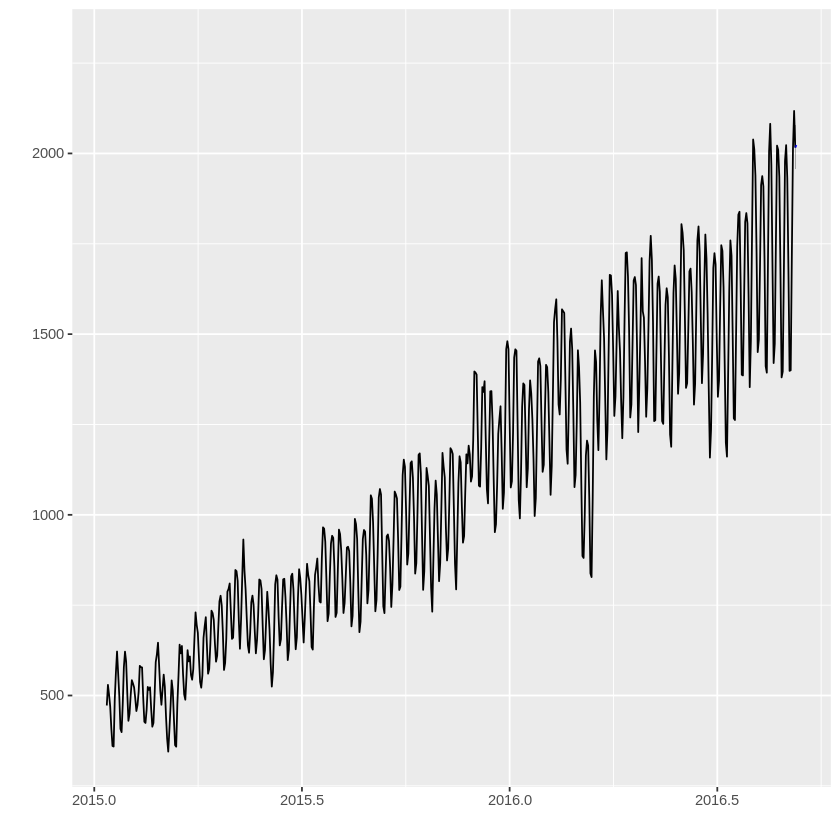

In [8]:
# Simple Moving Average dengan Orde 3
ma_model <- ma(ts_wayne_tower, order=3)

# Meramalkan data jumlah kendaraan pada Wayne Tower 1 periode ke depan
forecast_sma <- forecast(ma_model, h=1)
forecast_sma
autoplot(forecast_sma)

# RMSE
residuals_sma <- ts_wayne_tower - ma_model
rmse_sma <- sqrt(mean(residuals_sma^2, na.rm = TRUE))
cat("\nRMSE:", rmse_sma)

### **Interpretasi**
Diperoleh output di atas nilai forecast dengan metode Simple Moving Average dengan order 3 yaitu sebesar 2023.191 ≈ 2023 dan RMSE sebesar 103.2099 ≈ 103 yang menunjukkan bahwa data ramalan jumlah kendaraan pada Wayne Tower pada 1 Juli 2017 yaitu sekitar 2023 kendaraan dengan error 103 kendaraan.

### **Double Moving Average Arkham Bridge**

In [9]:
# Double Moving Average Arkham Bridge dengan Orde 3×5
ma_3 <- SMA(ts_arkham_bridge, n = 3)
dma_3x5 <- SMA(ma_3, n = 5)

at <- 2 * ma_3 - dma_3x5
bt <- (2 / (5 - 1)) * (ma_3 - dma_3x5)

# Meramalkan data jumlah kendaraan pada Arkham Bridge 1 periode ke depan
m <- 1
dma <- at[length(at)] + bt[length(bt)] * m
cat("Forecast:", dma)

# RMSE
residuals_dma <- ts_arkham_bridge - dma_3x5
rmse_dma <- sqrt(mean(residuals_dma^2, na.rm = TRUE))
cat("\nRMSE:", rmse_dma)

Forecast: 797.0333
RMSE: 86.91956

### **Interpretasi**
Diperoleh output di atas nilai forecast dengan metode Double Moving Average dengan order 3x5 yaitu sebesar 797.0333 ≈ 797 dan RMSE sebesar 86.91956 ≈ 87 yang menunjukkan bahwa data ramalan jumlah kendaraan pada Arkham Bridge pada 1 Juli 2017 yaitu sekitar 797 kendaraan dengan error 87 kendaraan.

## **c. Rute Terbaik yang Dipilih Batman untuk Mengejar Joker**

Berdasarkan forecast data jumlah kendaraan pada 1 Juli 2017 diperoleh hasil ramalan menggunakan Simple Moving Average pada Wayne Tower yaitu sebanyak 2023 kendaraan. Sedangkan, hasil ramalan menggunakan Double Moving Average pada Arkham Bridge yaitu sebanyak 797 kendaraan. Oleh karena itu, dapat disimpulkan bahwa Batman sebaiknya melewati rute Arkham Bridge karena jumlah kendaraan yang lebih sedikit dibandingkan rute Wayne Tower sehingga memungkinkan Batman lebih cepat dan efisien untuk mengejar Joker.

## **Jawaban Nomor 3**

In [10]:
# Import Data Nomor 3
data3 = read.xlsx("/content/Data Tugas 1.xlsx", sheet = 2)
head(data3)

,Date,Close
,<chr>,<dbl>
1,03/14/25,2420
2,03/13/25,2430
3,03/12/25,2450
4,03/11/25,2370
5,03/10/25,2390
6,03/07/25,2410


Terlihat bahwa data saham TLKM di atas mulai dari data terbaru ke data lebih lama, maka perlu diurutkan datanya menjadi data paling lama ke terbaru.

In [11]:
# Mengurutkan data dari paling lama ke terbaru
data3$Date <- as.Date(data3$Date, format="%m/%d/%y")
data3 <- data3 %>% arrange(Date)

head(data3)

,Date,Close
,<date>,<dbl>
1,2024-03-01,3920
2,2024-03-04,3940
3,2024-03-05,3870
4,2024-03-06,3900
5,2024-03-07,3900
6,2024-03-08,3860


In [12]:
# Mengubah tipe data saham TLKM menjadi time series
ts_data3 <- xts(data3$Close, order.by = data3$Date)

head(ts_data3)

           [,1]
2024-03-01 3920
2024-03-04 3940
2024-03-05 3870
2024-03-06 3900
2024-03-07 3900
2024-03-08 3860

## **a. Apakah data historis harga penutupan saham TLKM bersifat stasioner?**

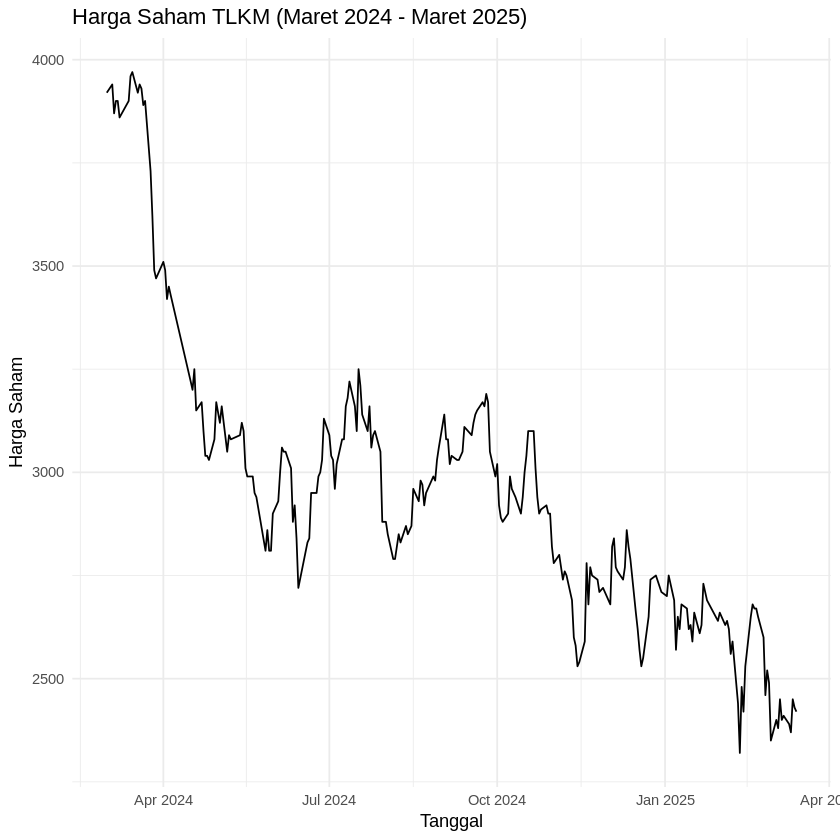

In [13]:
autoplot(ts_data3) +
  ggtitle("Harga Saham TLKM (Maret 2024 - Maret 2025)") +
  xlab("Tanggal") + ylab("Harga Saham") +
  theme_minimal()

### **Interpretasi**
Diperoleh output di atas plot data harga saham TLKM periode Maret 2024 sampai Maret 2025 terlihat bahwa harga saham cenderung mengalami tren penurunan meskipun terdapat beberapa kondisi fluktuasi dan kenaikan kecil di pertengahan periode tren keseluruhannya tetap menunjukkan pola turun.

In [14]:
# Augmented Dickey-Fuller (ADF) Test Data Saham TLKM
adf_saham_TLKM <- adf.test(ts_data3)
print(adf_saham_TLKM)


	Augmented Dickey-Fuller Test

data:  ts_data3
Dickey-Fuller = -3.3329, Lag order = 6, p-value = 0.06629
alternative hypothesis: stationary



### **Uji Stasioner Data Saham TLKM**
*   **Hipotesis**\
$H_0:$ Data saham TLKM bersifat tidak stasioner\
$H_1:$ Data saham TLKM bersifat stasioner

*   **Tingkat Signifikansi**\
$\alpha = 5\%$

*   **Statistik Uji**\
P-Value = $0.06629$

*   **Daerah Kritik**\
$H_0$ ditolak jika P-Value $< \alpha$

*   **Kesimpulan**\
Karena P-Value = $0.06629 > 5\%$, maka $H_0$ tidak ditolak. Sehingga dapat disimpulkan bahwa data saham TLKM bersifat tidak stasioner.

Berdasarkan uji stasioner data saham TLKM diperoleh hasil bahwa data historis harga penutupan saham TLKM bersifat tidak stasioner.

## **b. Peramalan Harga Saham TLKM**

In [18]:
# Double Moving Average
ma_3 <- SMA(ts_data3, n = 3)
dma_3x5 <- SMA(ma_3, n = 5)

# Komponen level (at) dan tren (bt)
at <- 2 * ma_3 - dma_3x5
bt <- (2 / (5 - 1)) * (ma_3 - dma_3x5)

# Meramalkan harga saham TLKM 3 periode ke depan
n <- length(at)
m_values <- 1:3
forecast_dma3x5 <- matrix(NA, nrow = n, ncol = length(m_values))
for (i in 1:n) {
  if (!is.na(at[i]) && !is.na(bt[i])) {
    forecast_dma3x5[i, ] <- sapply(m_values, function(m) at[i] + bt[i] * m)
  }
}
final_forecast <- forecast_dma3x5[n, ]
print(data.frame(Periode = m_values, Prediksi = final_forecast))

  Periode Prediksi
1       1 2470.333
2       2 2482.667
3       3 2495.000


### **Interpretasi**
Diperoleh output di atas hasil ramalan harga saham TLKM menggunakan Double Moving Average dengan order 3x5 untuk 3 periode ke depan berturut-turut adalah 2470.333, 2482.667, dan 2495.

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
247       2413.792 2334.702 2492.883 2292.834 2534.751
248       2407.535 2296.383 2518.687 2237.543 2577.527
249       2401.278 2265.427 2537.128 2193.512 2609.043


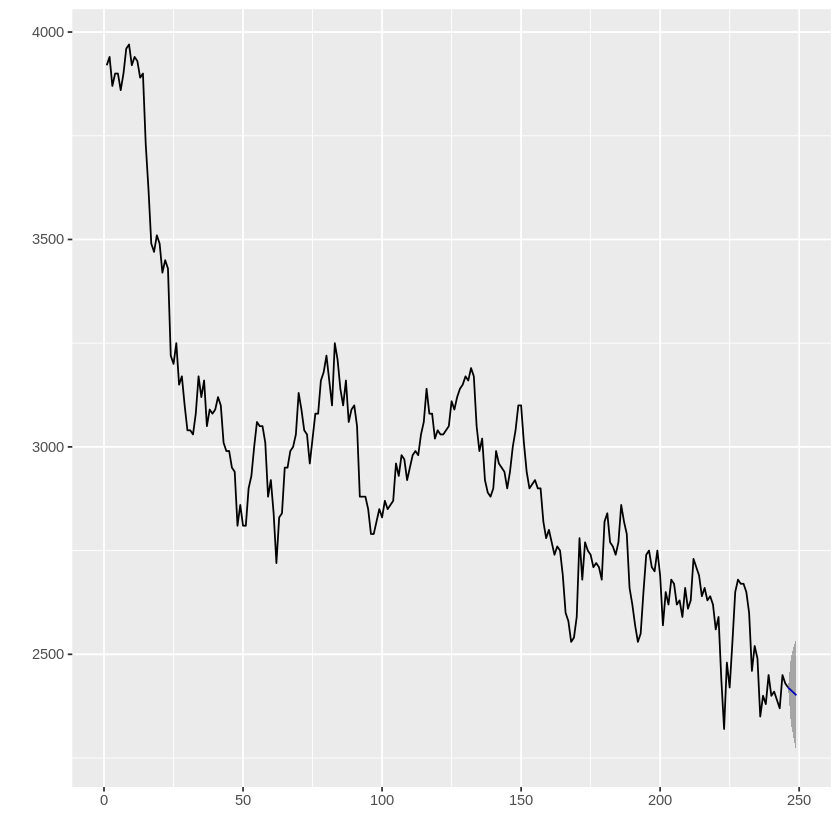

In [19]:
# Holt’s Linear Trend
model_holt <- holt(ts_data3, h = 3)

print(model_holt)
autoplot(model_holt)

### **Interpretasi**
Diperoleh output di atas hasil ramalan harga saham TLKM menggunakan Holt’s Linear Trend untuk 3 periode ke depan berturut-turut adalah 2413.792, 2407.535, dan 2401.278.

## **c. Perbandingan Metode Peramalan yang Paling Baik dalam Meramalkan Harga Saham TLKM**

In [27]:
# Evalusasi metode Double Moving Average
actual_values_dma3x5 <- tail(ts_data3, nrow(forecast_dma3x5))
valid_idx <- complete.cases(forecast_dma3x5) & complete.cases(actual_values_dma3x5)

# Hitung error metrics
mse_dma3x5 <- mean((actual_values_dma3x5[valid_idx] - forecast_dma3x5[valid_idx, 1])^2, na.rm = TRUE)
rmse_dma3x5 <- sqrt(mse_dma3x5)
mae_dma3x5 <- mean(abs(actual_values_dma3x5[valid_idx] - forecast_dma3x5[valid_idx, 1]), na.rm = TRUE)

results_dma3x5 <- data.frame(
  Metode = "Double Moving Average orde 3x5",
  MSE = mse_dma3x5,
  RMSE = rmse_dma3x5,
  MAE = mae_dma3x5
)

# Evalusasi metode Holt’s Linear Trend
accuracy_holt <- accuracy(model_holt)

rmse_holt <- accuracy_holt["Training set", "RMSE"]
mse_holt <- rmse_holt^2
mae_holt <- accuracy_holt["Training set", "MAE"]

results_holt <- data.frame(
  Metode = "Holt’s Linear Trend",
  MSE = mse_holt,
  RMSE = rmse_holt,
  MAE = mae_holt
)

compare_result <- rbind(results_dma3x5,results_holt)
print(compare_result)

                          Metode      MSE     RMSE      MAE
1 Double Moving Average orde 3x5 5805.851 76.19613 60.38333
2            Holt’s Linear Trend 3746.760 61.21079 46.47463


### **Interpretasi**
Diperoleh output di atas terlihat bahwa secara keseluruhan nilai MSE, RMSE, dan MAE metode Holt’s Linear Trend lebih kecil dibandingkan metode Double Moving Average orde 3x5 dalam meramalkan harga saham TLKM. Oleh karena itu, metode yang paling baik digunakan adalah Holt’s Linear Trend.

## **d. Return yang Didapatkan**

Return dapat dihitung menggunakan perhitungan Capital Gain

$Capital \ Gain = P_t - P_0 \times \frac{Modal \ Awal}{P_0}$

Keterangan:

* $P_0$: harga saham TLKM pada 10 Oktober 2024 (harga beli)
* $P_t$: harga saham TLKM pada 18 Maret 2025 (harga jual)
* $Modal \ Awal = Rp200.000$

### **Nilai $P_0$**

In [28]:
data3[data3$Date == as.Date("2024-10-10"), ]

,Date,Close
,<date>,<dbl>
143,2024-10-10,2950


Diperoleh nilai $P_0$ sebesar 2950

Diketahui bahwa pada dataset yang tersedia, harga saham ada sampai tanggal 14 Maret 2025 (hari Jumat). Karena pasar saham tidak beroperasi di hari Sabtu, Minggu, dan libur nasional, maka harga saham pada 18 Maret 2025 (hari Selasa) diambil dari peramalan atau forecast periode 2.

### **Nilai $P_t$**

In [30]:
model_holt

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
247       2413.792 2334.702 2492.883 2292.834 2534.751
248       2407.535 2296.383 2518.687 2237.543 2577.527
249       2401.278 2265.427 2537.128 2193.512 2609.043

Diperoleh nilai $P_t$ sebesar 2407.535

In [35]:
p0 <- 2950
pt <- 2407.535
modal <- 200000

capital_gain <- (pt-p0)*(modal/p0)
cat("Capital Gain:",capital_gain)

Capital Gain: -36777.29

Diperoleh nilai Capital Gain sebesar -36777.29 di mana bernilai negatif yang menunjukkan bahwa Salman akan mengalami kerugian dari investasi saham TLKM-nya. Hal ini berarti bahwa jika Salman menjual sahamnya pada 18 Maret 2025 harganya lebih rendah dibandingkan harga beli saham TLKM pada tanggal 10 Oktober 2024.

### **Return**

$R = \frac{P_t - P_0}{P_0} \times 100\%$

In [36]:
R <- ((pt-p0)/p0)*100
cat("Persentase Return:", R,"%\n")

nominal_R <- R*modal/100
cat("Nominal Return:", nominal_R)

Persentase Return: -18.38864 %
Nominal Return: -36777.29

Diperoleh nilai persentase Return sebesar $-18.39%$ yang menunjukkan bahwa Salman akan mengalami kerugian sebesar 18.39% dari modal investasinya yaitu sekitar Rp36777.29.